In [1]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [77]:
def img_rgb_histo(image, plot=True, mask_size=1.0):
    height, width, channels = image.shape
    mask = np.zeros(image.shape[:2], dtype="uint8")
    cv2.circle(mask, (width//2,height//2), int(min(width, height)*mask_size/2),  (255, 255, 255), -1)
    chans = cv2.split(image)
    colors = ("b", "g", "r")
    hist_lumi = cv2.calcHist([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)], [0], mask, [256], [0, 256])
    if (plot):
        fig, axs = plt.subplots(1, 2, figsize=(6, 2), sharey=True)
        axs[0].set_ylabel("# of Pixels")
        axs[1].set_ylabel("# of Pixels")
        axs[0].set_xlabel("pixel luminosity")
        axs[1].set_xlabel("color luminosity")
        axs[0].set_xlim([0, 256])
        axs[1].set_xlim([0, 256])
        axs[0].plot(hist_lumi, color='black')
        for (chan, color) in zip(chans, colors):
            hist_col = cv2.calcHist([chan], [0], mask, [256], [0, 256])
            axs[1].plot(hist_col, color=color)
        plt.show()
    mean_lumi = np.average(list(range(256)), weights=hist_lumi.flatten())
    return mean_lumi, hist_lumi
def img_hsv_histo(image, plot=True, mask_size=1.0):
    height, width, channels = image.shape
    mask = np.zeros(image.shape[:2], dtype="uint8")
    cv2.circle(mask, (width//2,height//2), int(min(width, height)*mask_size/2),  (255, 255, 255), -1)
    colors = ("purple", "orange", "gray")
    labels = ('h', 's', 'v')
    hsv_img = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    chans = cv2.split(hsv_img)
    hist_hsv = []
    if (plot):
        fig, axs = plt.subplots(figsize=(6, 2), sharey=True)
        axs.set_ylabel("# of Pixels")
        axs.set_xlabel("pixel value")
        axs.set_xlim([0, 256])
        for (chan, color, label) in zip(chans, colors, labels):
            hist_hsv.append(cv2.calcHist([chan], [0], mask, [256], [0, 256]))
            axs.plot(hist_hsv[-1], color=color, label=label)
        axs.legend()
        plt.show()
    mean_stauration = np.average(list(range(256)), weights=hist_hsv[1].flatten())
    return mean_stauration, hist_hsv

In [70]:
base_path = "E:/Focus stacking/2024-02-04 - Coleoptera remake/"
input_path = base_path+"Immagini modificate/"
filename = input_path + "_MG_4200.jpg"

In [71]:
img = cv2.imread(filename)

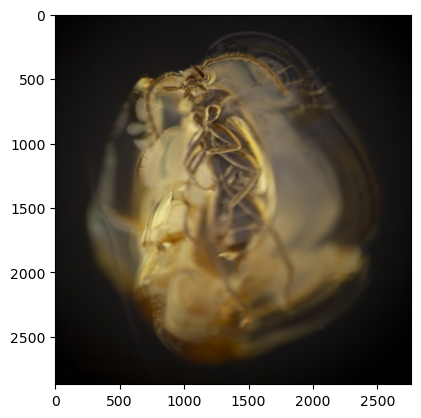

In [72]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

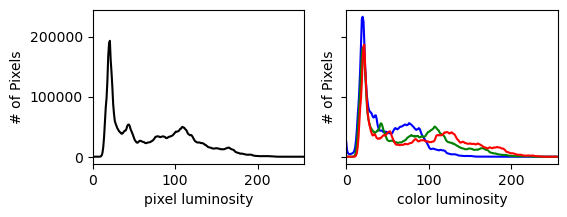

In [73]:
mean_lumi, hist_lumi = img_rgb_histo(img)

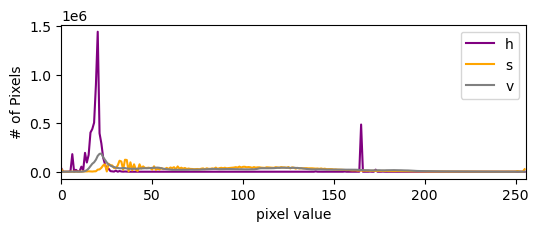

In [80]:
mean_saturation, hist_hsv = img_hsv_histo(img)

In [82]:
mean_saturation

89.92453060709462